# This notebook is for generating pre vs post integration figure for M2


# Set up workspace:

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context

In [2]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Myeloid_Objects')
os.getcwd()

'/scratch/user/s4436039/scdata/Myeloid_Objects'

Print software versions:

In [3]:
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


# Visualising Pre and Post integration

In [27]:
#read in data
data_pre = sc.read_h5ad('NRclean_unint.h5ad')
data_post = sc.read_h5ad('NRclean_post-int.h5ad')

# Add updated sample types and broad cancer types as done in later notebooks to both pre and post

In [28]:
#make a column new to store broad cancer type
data_pre.obs["cancer_type_broad"] = data_pre.obs["cancer_subtype"]
data_post.obs["cancer_type_broad"] = data_post.obs["cancer_subtype"]

In [29]:
#make a copy of the data containing just the breast cancers 
breast_pre = data_pre[data_pre.obs["cancer_subtype"].isin(["BRCA1 TNBC", "Breast Cancer", "Breast DCIS", "Breast IDC","ER Breast Cancer","HER2 Breast Cancer","TNBC"])]
breast_post = data_post[data_post.obs["cancer_subtype"].isin(["BRCA1 TNBC", "Breast Cancer", "Breast DCIS", "Breast IDC","ER Breast Cancer","HER2 Breast Cancer","TNBC"])]
#set all those in breast to Breast Cancer
breast_pre.obs["cancer_type_broad"] = "BC"
breast_post.obs["cancer_type_broad"] = "BC"

/scratch/temp/14489724/ipykernel_1003587/4084272633.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/scratch/temp/14489724/ipykernel_1003587/4084272633.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


In [30]:
#update the original object
data_pre.obs["cancer_type_broad"] = data_pre.obs["cancer_type_broad"].astype(str)
data_pre.obs["cancer_type_broad"].update(breast_pre.obs["cancer_type_broad"]) 
data_post.obs["cancer_type_broad"] = data_post.obs["cancer_type_broad"].astype(str)
data_post.obs["cancer_type_broad"].update(breast_post.obs["cancer_type_broad"]) 

/scratch/temp/14489724/ipykernel_1003587/3944069472.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/scratch/temp/14489724/ipykernel_1003587/3944069472.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [31]:
# check 
type_counts = data_pre.obs['cancer_type_broad'].value_counts()
print(type_counts)
type_counts = data_post.obs['cancer_type_broad'].value_counts()
print(type_counts)

cancer_type_broad
HGSOC             212113
NA                 63560
NSCLC              54888
HNSCC              52671
GBM                34244
BC                 31836
PDAC               14079
HCC                12040
Melanoma           10542
CRC                 3879
iCCA                3543
GAC                 2898
NPC                 1610
Acral Melanoma       479
Name: count, dtype: int64
cancer_type_broad
HGSOC             212113
NA                 63560
NSCLC              54888
HNSCC              52671
GBM                34244
BC                 31836
PDAC               14079
HCC                12040
Melanoma           10542
CRC                 3879
iCCA                3543
GAC                 2898
NPC                 1610
Acral Melanoma       479
Name: count, dtype: int64


In [32]:
data_pre.obs["sample_type_major2"] = data_pre.obs["sample_type_major"]
data_post.obs["sample_type_major2"] = data_post.obs["sample_type_major"]

In [33]:
#make a copy 
local_pre = data_pre[data_pre.obs["sample_type_major"].isin(["local recurrence"])]
local_post = data_post[data_post.obs["sample_type_major"].isin(["local recurrence"])]

In [34]:
#set to primary tumour
local_pre.obs["sample_type_major2"] = "primary tumour"
local_post.obs["sample_type_major2"] = "primary tumour"

/scratch/temp/14489724/ipykernel_1003587/3230647582.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/scratch/temp/14489724/ipykernel_1003587/3230647582.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


In [35]:
#update  
data_pre.obs["sample_type_major2"] = data_pre.obs["sample_type_major2"].astype(str)
data_pre.obs["sample_type_major2"].update(local_pre.obs["sample_type_major2"]) 
data_post.obs["sample_type_major2"] = data_post.obs["sample_type_major2"].astype(str)
data_post.obs["sample_type_major2"].update(local_post.obs["sample_type_major2"]) 

/scratch/temp/14489724/ipykernel_1003587/889732121.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/scratch/temp/14489724/ipykernel_1003587/889732121.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [36]:
# check 
type_counts = data_pre.obs['sample_type_major2'].value_counts()
print(type_counts)
type_counts = data_post.obs['sample_type_major2'].value_counts()
print(type_counts)

sample_type_major2
primary tumour       273199
metastatic tumour    127369
healthy               63560
ascites               34254
Name: count, dtype: int64
sample_type_major2
primary tumour       273199
metastatic tumour    127369
healthy               63560
ascites               34254
Name: count, dtype: int64


In [37]:
del breast_post
del breast_pre
del local_post
del local_pre

In [38]:
data_pre.obs["cancer_broadest"] = data_pre.obs["cancer_type_broad"]
data_post.obs["cancer_broadest"] = data_post.obs["cancer_type_broad"]

In [39]:
#make a copy 
acral_pre = data_pre[data_pre.obs["cancer_type_broad"].isin(["Acral Melanoma","Melanoma"])]
acral_post = data_post[data_post.obs["cancer_type_broad"].isin(["Acral Melanoma","Melanoma"])]

In [40]:
#set to melanoma
acral_pre.obs["cancer_broadest"] = "MEL"
acral_post.obs["cancer_broadest"] = "MEL"

/scratch/temp/14489724/ipykernel_1003587/1097402606.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/scratch/temp/14489724/ipykernel_1003587/1097402606.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


In [41]:
#update  
data_pre.obs["cancer_broadest"] = data_pre.obs["cancer_broadest"].astype(str)
data_pre.obs["cancer_broadest"].update(acral_pre.obs["cancer_broadest"]) 

data_post.obs["cancer_broadest"] = data_post.obs["cancer_broadest"].astype(str)
data_post.obs["cancer_broadest"].update(acral_post.obs["cancer_broadest"]) 

/scratch/temp/14489724/ipykernel_1003587/1292730383.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/scratch/temp/14489724/ipykernel_1003587/1292730383.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [42]:
# check 
type_counts = data_pre.obs['cancer_broadest'].value_counts()
print(type_counts)
type_counts = data_post.obs['cancer_broadest'].value_counts()
print(type_counts)

cancer_broadest
HGSOC    212113
NA        63560
NSCLC     54888
HNSCC     52671
GBM       34244
BC        31836
PDAC      14079
HCC       12040
MEL       11021
CRC        3879
iCCA       3543
GAC        2898
NPC        1610
Name: count, dtype: int64
cancer_broadest
HGSOC    212113
NA        63560
NSCLC     54888
HNSCC     52671
GBM       34244
BC        31836
PDAC      14079
HCC       12040
MEL       11021
CRC        3879
iCCA       3543
GAC        2898
NPC        1610
Name: count, dtype: int64


In [43]:
data_pre

AnnData object with n_obs × n_vars = 498382 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'sample_type_major2', 'cancer_broadest'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: '

In [44]:
data_post

AnnData object with n_obs × n_vars = 498382 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'sample_type_major2', 'cancer_broadest'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: '

In [45]:
del acral_post
del acral_pre

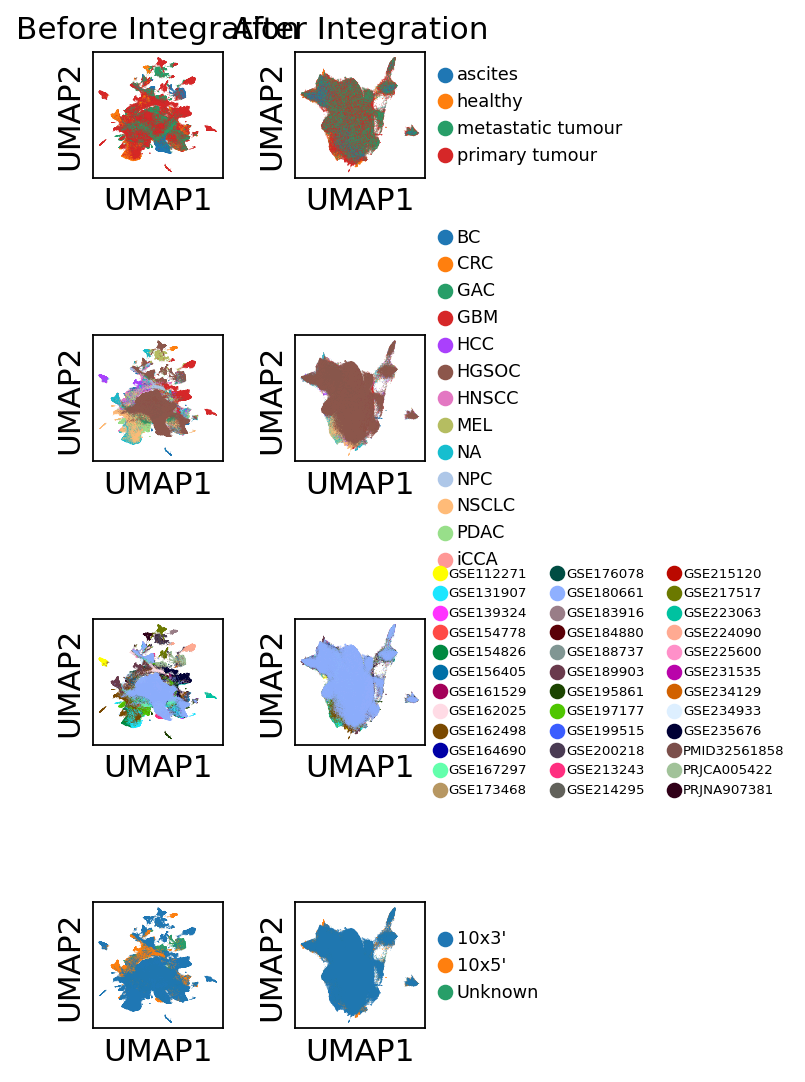

In [48]:
#plotting cancer type, dataset, tech first to set colours

fig, axes = plt.subplots(4, 2, figsize=(5, 7))  # Create a figure with 4 rows and 2 columns

# sample type
sc.pl.umap(
    data_pre,
    color=["sample_type_major2"],
    ncols=1,
    ax=axes[0,0],  # Plot top left
    show=False,
    legend_loc=None,  # Hide the legend
    title="Before Integration"
)

sc.pl.umap(
    data_post,
    color=["sample_type_major2"],
    ncols=1,
    ax=axes[0,1],  # Plot top right
    show=False,
    legend_fontsize=8,
    title="After Integration"
)

# cancer type
sc.pl.umap(
    data_pre,
    color=["cancer_broadest"],
    ncols=1,
    ax=axes[1,0],  
    show=False,
    legend_loc=None,  # Hide the legend
    title=""
)    

sc.pl.umap(
    data_post,
    color=["cancer_broadest"],
    ncols=1,
    ax=axes[1,1],  
    show=False,
    legend_fontsize=8,
    title=""
)

# dataset
sc.pl.umap(
    data_pre,
    color=["dataset_id"],
    ncols=1,
    ax=axes[2,0],  
    show=False,
    legend_loc=None,  # Hide the legend
    title=""
)

sc.pl.umap(
    data_post,
    color=["dataset_id"],
    ncols=1,
    ax=axes[2,1],  
    show=False,
    legend_fontsize=6,
    title=""
)

# Tech
sc.pl.umap(
    data_pre, 
    color="Technology",
    ncols=1,
    ax=axes[3, 0],
    show=False,
    legend_loc=None,  # Hide the legend
    title=""
)

sc.pl.umap(
    data_post, 
    color="Technology",
    ncols=1,
    ax=axes[3, 1],
    show=False,
    legend_fontsize=8,
    title=""
)

plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

### UMAP Visualisation:

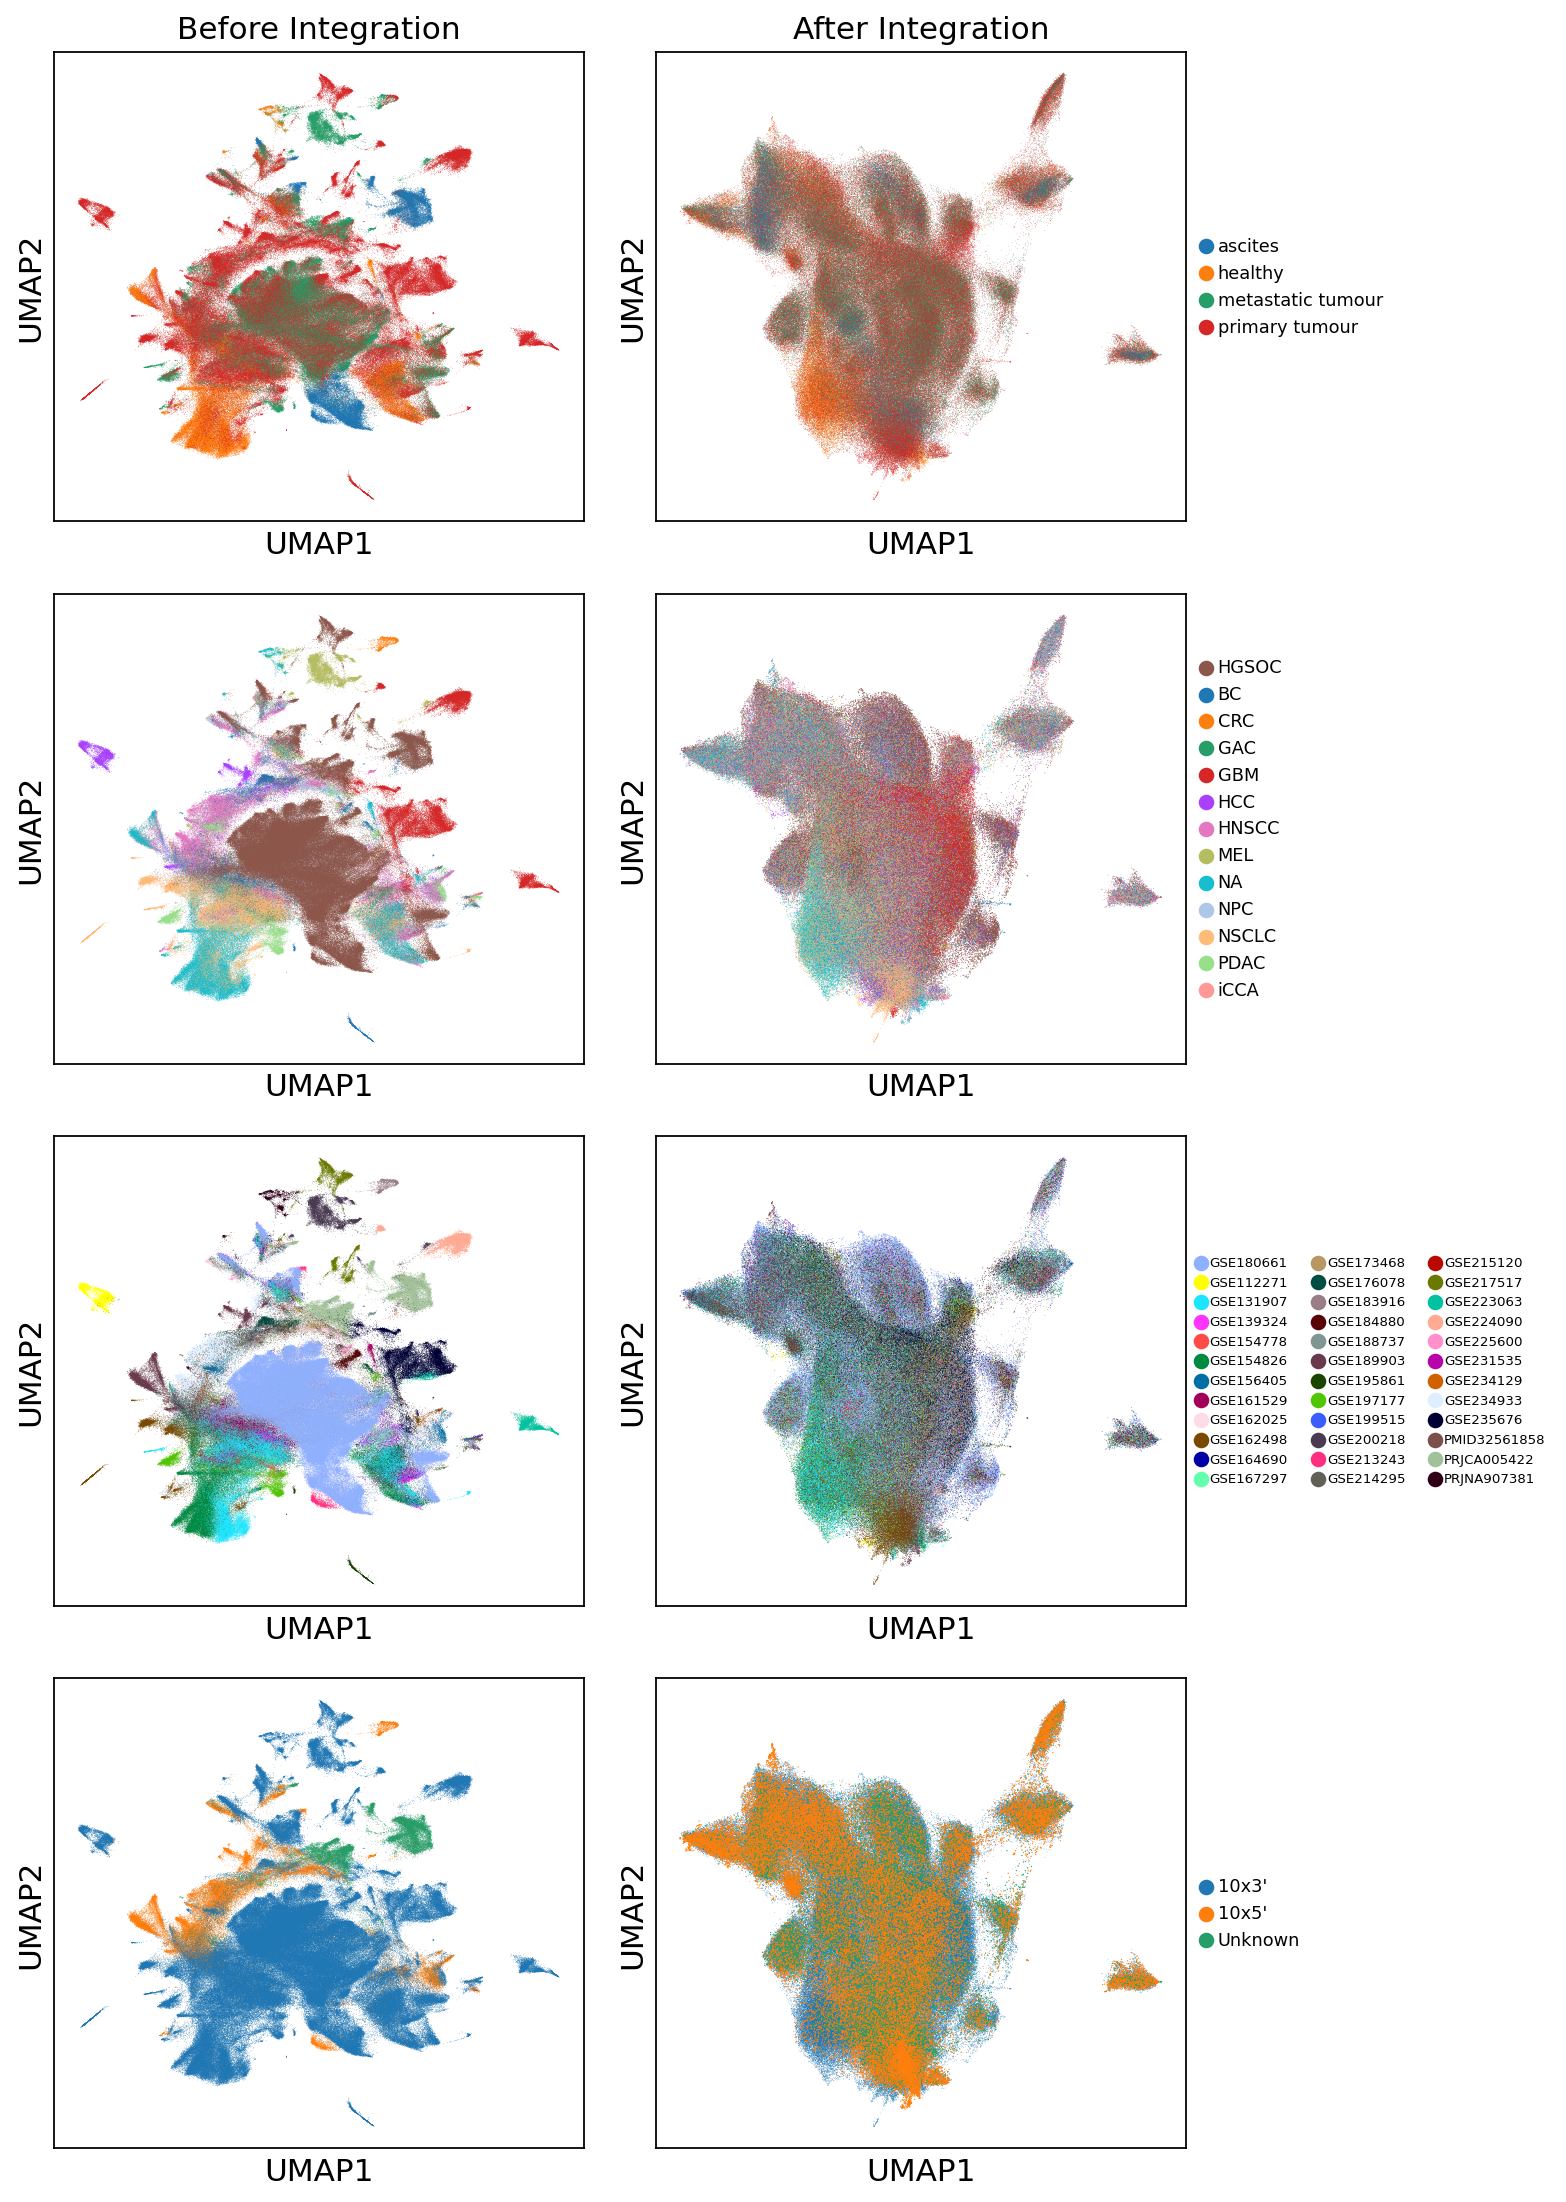

In [49]:
fig, axes = plt.subplots(4, 2, figsize=(10, 14))  # Create a figure with 4 rows and 2 columns

# sample type
sc.pl.umap(
    data_pre,
    color=["sample_type_major2"],
    ncols=1,
    ax=axes[0,0],  # Plot top left
    show=False,
    legend_loc=None,  # Hide the legend
    title="Before Integration"
)

sc.pl.umap(
    data_post,
    color=["sample_type_major2"],
    ncols=1,
    ax=axes[0,1],  # Plot top right
    show=False,
    legend_fontsize=8,
    title="After Integration"
)

# cancer type
sc.pl.umap(
    data_pre,
    color=["cancer_broadest"],
    ncols=1,
    ax=axes[1,0],  
    show=False,
    legend_loc=None,  # Hide the legend
    title=""
)    

sc.pl.umap(
    data_post[data_post.obs["cancer_broadest"] == "HGSOC"],
    color=["cancer_broadest"],
    ncols=1,
    ax=axes[1,1],  
    show=False,
    legend_fontsize=8,
    title=""
)

sc.pl.umap(
    data_post[data_post.obs["cancer_broadest"] != "HGSOC"],
    color=["cancer_broadest"],
    ncols=1,
    ax=axes[1,1],  
    show=False,
    legend_fontsize=8,
    title=""
)

# dataset
sc.pl.umap(
    data_pre,
    color=["dataset_id"],
    ncols=1,
    ax=axes[2,0],  
    show=False,
    legend_loc=None,  # Hide the legend
    title=""
)

sc.pl.umap(
    data_post[data_post.obs["dataset_id"] == "GSE180661"],
    color=["dataset_id"],
    ncols=1,
    ax=axes[2,1],  
    show=False,
    legend_fontsize=6,
    title=""
)

sc.pl.umap(
    data_post[data_post.obs["dataset_id"] != "GSE180661"],
    color=["dataset_id"],
    ncols=1,
    ax=axes[2,1],  
    show=False,
    legend_fontsize=6,
    title=""
)

# Tech
sc.pl.umap(
    data_pre, 
    color="Technology",
    ncols=1,
    ax=axes[3, 0],
    show=False,
    legend_loc=None,  # Hide the legend
    title=""
)

# split tech post in 2 so I can plot unknown and 5' on top of 3' otherwsise 3' just covers everything
sc.pl.umap(
    data_post[data_post.obs["Technology"] == "10x3'"], 
    color="Technology",
    ncols=1,
    ax=axes[3, 1],
    show=False,
    legend_fontsize=8,
    title=""
)

sc.pl.umap(
    data_post[data_post.obs["Technology"] != "10x3'"],  
    color="Technology",
    ncols=1,
    ax=axes[3, 1],
    show=False,
    legend_fontsize=8,
    title=""
)

plt.tight_layout()  # Adjust layout to prevent overlap

# Save as SVG
plt.savefig("umap_pre-post-int.svg", format="svg")

plt.show()